In [18]:
import cv2
import numpy as np
import scipy
from scipy.misc import imread
import pickle as pickle
import random
import os
import matplotlib.pyplot as plt

In [19]:
def ext_feat(path, vec_size=32):
    image = imread(path, mode="RGB")
    try:
        algo = cv2.KAZE_create()
        
        kp = algo.detect(image)
        kp = sorted(kp, key=lambda x: -x.response)[:vec_size]
        kp, dsc = algo.compute(image, kp)
        dsc = dsc.flatten()
        needed_size = (vec_size * 64)
        if dsc.size < needed_size:
            dsc = np.concatenate([dsc, np.zeros(needed_size - dsc.size)])
    except cv2.error as e:
        print ('Error: ', e)
        return None

    return dsc

def batch_extractor(path, pickled_db_path="features.pck"):
    files = [os.path.join(path, p) for p in sorted(os.listdir(path))]

    result = {}
    for f in files:
        print ('Extracting features from image %s' % f)
        name = f.split('/')[-1].lower()
        result[name] = ext_feat(f)
    
    with open(pickled_db_path, 'wb') as fp:
        pickle.dump(result, fp)

In [20]:
class Matcher(object):

    def __init__(self, pickled_db_path="features.pck"):
        with open(pickled_db_path,'rb') as p:
            self.data = pickle.load(p)
        self.names = []
        self.matrix = []
        for k, v in self.data.items():
            self.names.append(k)
            self.matrix.append(v)
        self.matrix = np.array(self.matrix)
        self.names = np.array(self.names)

    def cos_cdist(self, vector):
        v = vector.reshape(1, -1)
        return scipy.spatial.distance.cdist(self.matrix, v, 'cosine').reshape(-1)

    def match(self, path, topn=5):
        features = extract_features(path)
        img_distances = self.cos_cdist(features)
        nearest_ids = np.argsort(img_distances)[:topn].tolist()
        nearest_img_paths = self.names[nearest_ids].tolist()

        return nearest_img_paths, img_distances[nearest_ids].tolist()

Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\100000.png


C:\Users\srira\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\100001.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\100002.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\100100.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\100101.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\100200.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\100201.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\100300.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\

Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\102402.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\102500.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\102501.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\102600.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\102601.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\102700.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\102701.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\

Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\104600.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\104601.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\104700.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\104701.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\104800.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\104801.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\104802.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\

Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\106800.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\106801.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\106900.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\106901.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\106902.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\106903.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\107000.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\

Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\109201.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\109300.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\109301.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\109400.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\109401.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\109402.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\109500.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\

Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\112000.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\112001.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\112002.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\112003.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\112100.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\112101.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\112200.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\

Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\114300.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\114301.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\114400.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\114401.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\114402.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\114500.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\114501.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\

Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\116703.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\116800.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\116801.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\116802.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\116803.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\116900.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\116901.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\

Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\119200.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\119201.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\119202.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\119203.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\119300.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\119301.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\119400.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\

Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\121601.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\121700.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\121701.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\121800.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\121801.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\121900.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\121901.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\

Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\123404.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\123500.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\123501.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\123601.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\123602.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\123700.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\123701.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\

Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\126100.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\126101.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\126102.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\126200.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\126201.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\126202.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\126300.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\

Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\128400.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\128401.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\128500.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\128501.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\128502.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\128600.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\vacation-image-search-engine\dataset\128601.png
Extracting features from image C:\Users\srira\Desktop\vacation-image-search-engine\

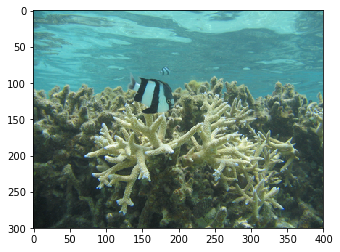

Result images
Match 1.0


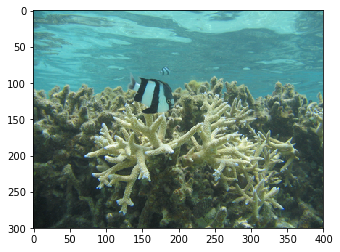

Match 0.8228476709302681


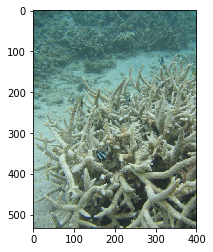

Match 0.8187856405817303


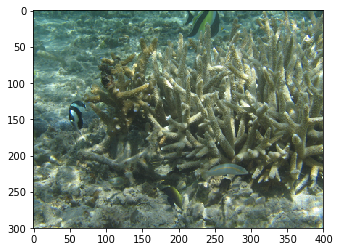

Query image


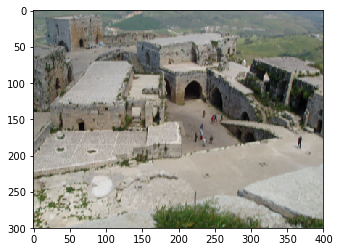

Result images
Match 1.0


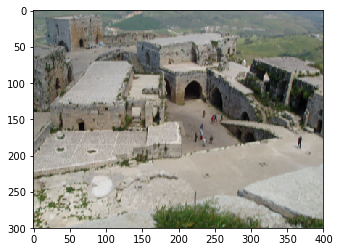

Match 0.8182268956922478


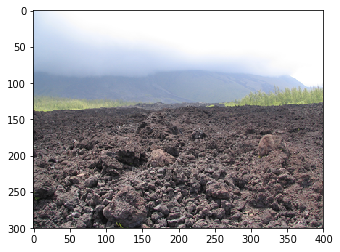

Match 0.8143032663397951


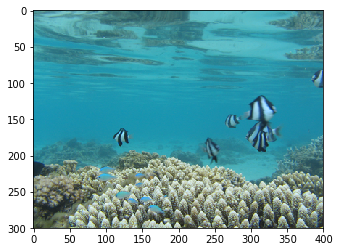

Query image


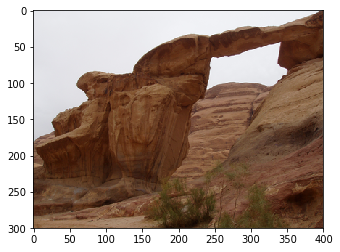

Result images
Match 1.0


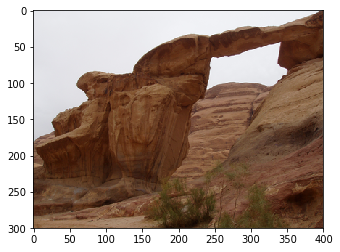

Match 0.5171792755103107


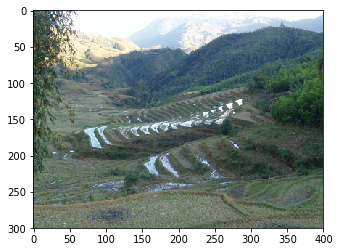

Match 0.5160131817132398


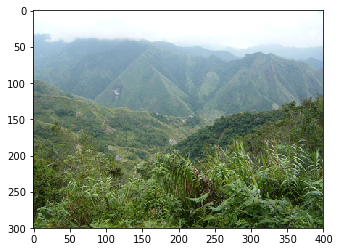

In [21]:
def show_img(path):
    img = imread(path, mode="RGB")
    plt.imshow(img)
    plt.show()
    
def run():
    images_path = 'C:\\Users\\srira\\Desktop\\vacation-image-search-engine\\vacation-image-search-engine\\dataset'
    files = [os.path.join(images_path, p) for p in sorted(os.listdir(images_path))] 
    sample = random.sample(files, 3)
    batch_extractor(images_path)
    ma = Matcher('features.pck')
    for s in sample:
        print ('Query image')
        show_img(s)
        names, match = ma.match(s, topn=3)
        print ('Result images')
        for i in range(3):
            print ('Match %s' % (1-match[i]))
            show_img(os.path.join(images_path, names[i]))

run()